In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Dimensionen von Feature Maps
In diesem Notebook wird die Auswirkung verschiedener Parameter der Konvolution und des Poolings auf eine Feature Map erklärt und dargestellt.

Bei der standardmäßigen Konvolution ist der Output kleiner als der Input. Folgendes Beispiel stellt das dar. Das blaue Rechteck ist der Kernel, der über das Bild verschoben wird (die Eckpositionen werden gezeigt). Der mittlere Pixel des Kernels ist der Pixel, an dessen Stelle der neue Wert geschrieben wird. Werden alle Positionen des Kernels vereint, ergibt sich das rote Rechteck mit den Dimensionen des Outputs.

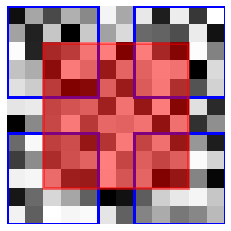

In [3]:
imSize = 12
k = 5
randImage = np.random.rand(imSize, imSize)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.axis("off")
ax.imshow(randImage, cmap="Greys")
ax.add_patch(Rectangle((-.5,-.5),k,k, fill=False, lw=3, color="b"))
ax.add_patch(Rectangle((-.5,imSize-k-.5),k,k, fill=False, lw=3, color="b"))
ax.add_patch(Rectangle((imSize-k-.5,imSize-k-.5),k,k, fill=False, lw=3, color="b"))
ax.add_patch(Rectangle((imSize-k-.5,-.5),k,k, fill=False, lw=3, color="b"))
ax.add_patch(Rectangle((int(k/2)-.5,int(k/2)-.5),imSize-int(k/2)*2,imSize-int(k/2)*2, fill=True, alpha=.5, lw=3, color="r"))
plt.show()

### Padding
Um die Dimensionen des Originalbilds beizubehalten, wird Padding angewandt. Im folgenden Beispiel werden die äußersten Pixel kopiert, bis nach der Konvolution die Dimensionen der Feature Map gleich denen vor der Konvolution sind.<br>
Zusätzlich zu den schon zuvor eingezeichneten Rechtecken wird ein grüner Rand um die Input-Feature-Map gelegt. Der grüne Rahmen und das rote Rechteck haben exakt die gleiche Größe => die Output-Feature-Map hat die gleiche Dimensionen wie der Input des Layers

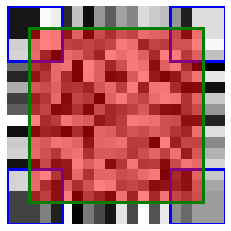

In [81]:
imSize = 16
k = 5
randImage = np.random.rand(imSize, imSize)
padding = int(k/2)
imSize = imSize + padding
padded = np.zeros((imSize+padding, imSize+padding))
padded[padding:imSize,padding:imSize] = randImage
for x in range(padding):
    padded[x, :] = padded[padding]
    padded[imSize+x, :] = padded[imSize-1]
    padded[:, x] = padded[:,padding]
    padded[:, imSize+x] = padded[:,imSize-1]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.axis("off")
ax.imshow(padded, cmap="Greys")
ax.add_patch(Rectangle((-.5,-.5),k,k, fill=False, lw=3, color="b"))
ax.add_patch(Rectangle((-.5,imSize+padding-k-.5),k,k, fill=False, lw=3, color="b"))
ax.add_patch(Rectangle((imSize+padding-k-.5,imSize+padding-k-.5),k,k, fill=False, lw=3, color="b"))
ax.add_patch(Rectangle((imSize+padding-k-.5,-.5),k,k, fill=False, lw=3, color="b"))
ax.add_patch(Rectangle((int(k/2)-.5,int(k/2)-.5),
                       imSize+padding-int(k/2)*2,
                       imSize+padding-int(k/2)*2,
                       fill=True, alpha=.5, lw=3, color="r"))
ax.add_patch(Rectangle((int(k/2)-.5,int(k/2)-.5),
                       imSize+padding-int(k/2)*2,
                       imSize+padding-int(k/2)*2,
                       fill=False, lw=3, color="g"))
plt.show()

### Schrittweite (Stride)
Die Schrittweite (englisch stride) beschreibt, um wie viele Pixel der Kernel pro Konvolutionsschritt verschoben wird. Bei der Konvolution ist ein stride von $1$ am häufigsten anzutreffen, während beim Pooling die Schrittweite gleich der Kernelgröße genommen wird und es so keine Überlappung zwischen den Regionen gibt, die jeweils einen Pixel berechnen.<br>
Folgendes Beispiel zeigt den Einfluss der Schrittweite auf die Outputdimensionen. Es ist direkt zu erkennen, dass die Outputpixel eine deutlich geringere Anzahl haben als die Inputpixel.

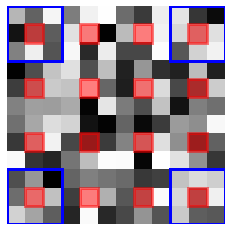

In [112]:
imSize = 12
k = 3
stride = 3
randImage = np.random.rand(imSize, imSize)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.axis("off")
ax.imshow(randImage, cmap="Greys")
lastPos = 0
for i in range(0, imSize-k+1, stride):
    lastPos = max(i, lastPos)
    for j in range(0, imSize-k+1, stride):
        ax.add_patch(Rectangle((i+int(k/2)-.5,j+int(k/2)-.5),1,1, fill=True, alpha=.5, lw=3, color="r"))

lastPos = lastPos - .5
ax.add_patch(Rectangle((-.5,-.5),k,k, fill=False, lw=3, color="b"))
ax.add_patch(Rectangle((-.5,lastPos),k,k, fill=False, lw=3, color="b"))
ax.add_patch(Rectangle((lastPos,lastPos),k,k, fill=False, lw=3, color="b"))
ax.add_patch(Rectangle((lastPos,-.5),k,k, fill=False, lw=3, color="b"))
plt.show()